In [1]:
from time import time
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#plotting library
import matplotlib.pyplot as plt 
from matplotlib import offsetbox
from plotnine import *
import seaborn as sn 

#manifold
from sklearn import (manifold,datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#random forest classifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.inspection import permutation_importance

#create GUI
import tkinter as tk

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import statsmodels.api as sm

In [2]:
#the file contains uncleaned data in the form of columns starting with a number
#neither python nor R handle these columns cleanly
#examples are 13Aph and 13Aph90
#python can handle these columns as numeric but cannot convert them to factor
#renaming the columns do not seem to work eg data.rename(columns={'13Aph':'Aphasia'},inplace=TRUE)
#these are best handle using the iloc methd to relabel the columns

data=pd.read_csv('CSV2 - For binaries160817.csv')
#check column headers
data.head()


,DOS,gender,Age,ST6,R0_bin,R0,Rankin90,R3_binary,#attempts,final_outcome,...,7LA90,8RA90,9LL90,10RL90,Ataxia90,Sensory90,13Aph90,Dysarthria90,Extinction90,NIHSS90
0,11/11/2006,1,60,0,0,4,1,0,1,0,...,1,0,1,0,0,0,0,0,0,2
1,28/03/2007,1,76,0,1,2,2,0,1,0,...,1,0,1,0,1,1,0,0,0,4
2,29/07/2007,1,83,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1/09/2007,1,56,0,0,4,1,0,1,0,...,0,0,0,0,0,0,0,1,0,2
4,16/03/2010,1,60,0,0,3,2,0,1,0,...,1,0,1,0,0,0,0,0,0,3


In [3]:
data.isnull().sum()

DOS             0
gender          0
Age             0
ST6             0
R0_bin          0
               ..
Sensory90       0
13Aph90         0
Dysarthria90    0
Extinction90    0
NIHSS90         0
Length: 130, dtype: int64

In [4]:
#list(data.columns)
list(data)

['DOS',
 'gender',
 'Age',
 'ST6',
 'R0_bin',
 'R0',
 'Rankin90',
 'R3_binary',
 '#attempts',
 'final_outcome',
 'time_pass',
 'date_outcome',
 'time_outcome',
 'LOC_bin',
 '1LOC',
 'q_bin',
 '2Q',
 'con_bin',
 '3C',
 'Gaze_bin',
 '4Gaze',
 'Vis_binary',
 'Visualfield',
 'face_bin',
 '6F',
 'LA_bin',
 '7LA',
 'RA_bin',
 '8RA',
 'LL_bin',
 '9LL',
 'RL_bin',
 '10RL',
 'Atax_bin',
 'Ataxia',
 'sens_bin',
 'Sensory',
 '13Aph',
 'dysarth_bin',
 'Dysarthria',
 'Extinction',
 'NIHSS',
 'Ext_binary',
 'Aph_bin',
 'CVA',
 'IHD',
 'AF',
 'Diabetes',
 'etOH',
 'Smoker',
 'HTN',
 'Lipid',
 'dateoffroad',
 'lesson completed',
 'date_first_attempt',
 'first_outcome',
 'date_second_attempt',
 'second_outcome',
 'third_outcome',
 'fourth_outcome',
 'ROAD LAW %',
 'car type',
 'social',
 'eye_acuityR',
 'eye_acuity L',
 'eye_binocular',
 'Rmotor',
 'Lmotor',
 'R hip 1-in 0-im',
 'R knee',
 'R ankle D',
 'R ankle P',
 'L hip',
 'L knee',
 'L ankle D',
 'L ankle P',
 'E2.1',
 'E2.2',
 'E2.3',
 'E2.4',
 '

In [5]:
#subset
data1=data[['Age','gender','time_outcome','13Aph','Extinction','Visualfield','13Aph90','Extinction90','NIHSS','NIHSS90','Visualfield90','Rankin90','final_outcome']]
data1.rename(columns={'13Aph':'Aphasia',
                     '13Aph90':'Aphasia90'})
list(data1)

['Age',
 'gender',
 'time_outcome',
 '13Aph',
 'Extinction',
 'Visualfield',
 '13Aph90',
 'Extinction90',
 'NIHSS',
 'NIHSS90',
 'Visualfield90',
 'Rankin90',
 'final_outcome']

In [6]:
#python index start at 0
#deal with columns starting with number by index location
data1.columns.values[3] = "Aphasia"
data1.columns.values[6]='Aphasia90'
list(data1)

['Age',
 'gender',
 'time_outcome',
 'Aphasia',
 'Extinction',
 'Visualfield',
 'Aphasia90',
 'Extinction90',
 'NIHSS',
 'NIHSS90',
 'Visualfield90',
 'Rankin90',
 'final_outcome']

In [7]:
data1.isnull().sum()

Age              0
gender           0
time_outcome     0
Aphasia          0
Extinction       0
Visualfield      0
Aphasia90        0
Extinction90     0
NIHSS            0
NIHSS90          0
Visualfield90    0
Rankin90         0
final_outcome    0
dtype: int64

In [8]:
X=data1['Age']
Y=data1['NIHSS90']

#X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
#mp.plot(X,Y)


                                 OLS Regression Results                                
Dep. Variable:                NIHSS90   R-squared (uncentered):                   0.553
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              123.9
Date:                Sun, 05 Jan 2020   Prob (F-statistic):                    3.32e-19
Time:                        22:29:48   Log-Likelihood:                         -179.06
No. Observations:                 101   AIC:                                      360.1
Df Residuals:                     100   BIC:                                      362.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
#list column names
data.values

array([['11/11/2006', 1, 60, ..., 0, 0, 2],
       ['28/03/2007', 1, 76, ..., 0, 0, 4],
       ['29/07/2007', 1, 83, ..., 0, 0, 0],
       ...,
       ['30/11/2014', 1, 65, ..., 0, 0, 0],
       ['26/11/2014', 1, 71, ..., 0, 0, 2],
       ['17/11/2014', 1, 61, ..., 0, 0, 1]], dtype=object)

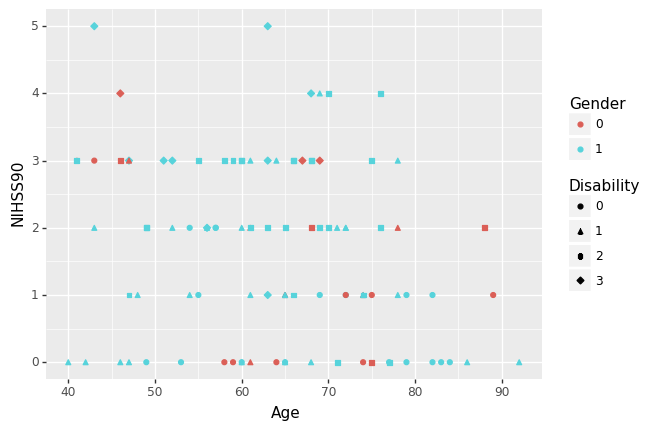

<ggplot: (100755181404)>

In [10]:
(ggplot (data1)
 + geom_point(aes('Age', 'NIHSS90',color='factor(gender)',shape='factor(Rankin90)'))
)+labs(color='Gender',shape='Disability')


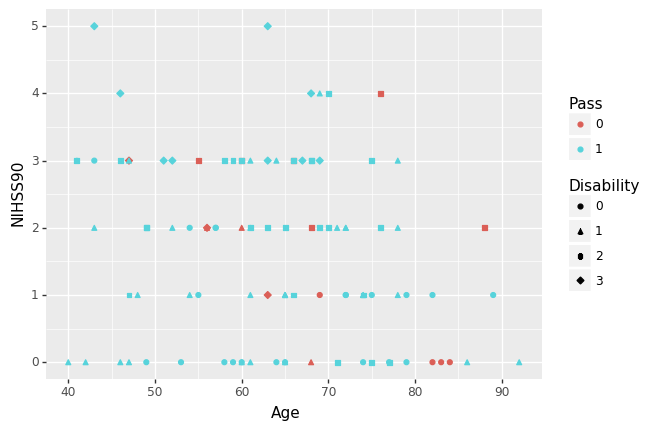

<ggplot: (100755348039)>

In [11]:
(ggplot (data1)
 + geom_point(aes('Age', 'NIHSS90',color='factor(final_outcome)',shape='factor(Rankin90)'))
)+labs(color='Pass',shape='Disability')


In [12]:
data1.isnull().sum()

Age              0
gender           0
time_outcome     0
Aphasia          0
Extinction       0
Visualfield      0
Aphasia90        0
Extinction90     0
NIHSS            0
NIHSS90          0
Visualfield90    0
Rankin90         0
final_outcome    0
dtype: int64

In [13]:
#drop data
#X = data1.drop (['final_outcome'],axis=1)

#iloc method does not result in NA
X=data1.iloc[:,:-1]

y = data1['final_outcome']

X.isnull().sum()

Age              0
gender           0
time_outcome     0
Aphasia          0
Extinction       0
Visualfield      0
Aphasia90        0
Extinction90     0
NIHSS            0
NIHSS90          0
Visualfield90    0
Rankin90         0
dtype: int64

In [14]:
#initialise tsne
tsne = TSNE(n_components=2, perplexity=10,random_state=0)
#perform tsne
tsne_obj= tsne.fit_transform(X)
#create data frame from results
#first dimension label X
#second dimension label Y
#outcome variable label Outcome
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Pass':y})
#merge data frames by columns
df = pd.concat([data1,tsne_df],axis=1)



In [15]:
#check data
list(df)

['Age',
 'gender',
 'time_outcome',
 'Aphasia',
 'Extinction',
 'Visualfield',
 'Aphasia90',
 'Extinction90',
 'NIHSS',
 'NIHSS90',
 'Visualfield90',
 'Rankin90',
 'final_outcome',
 'X',
 'Y',
 'Pass']

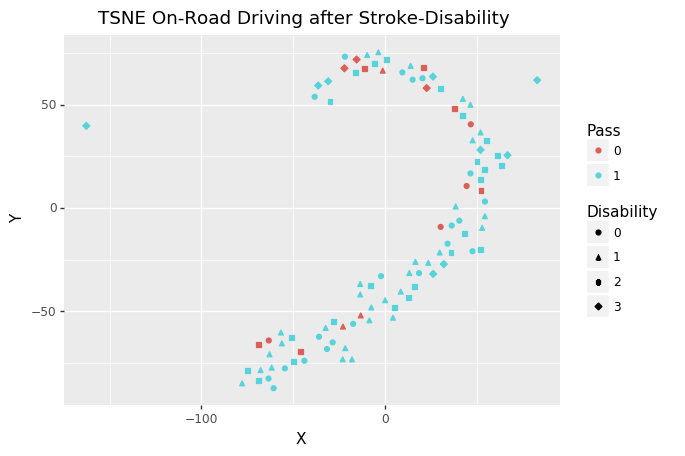

<ggplot: (100755533730)>

In [16]:
#ggplot style
#note the use of data merged from tsne output
(ggplot (df)
 + geom_point(aes('X ', 'Y',color='factor(final_outcome)',shape='factor(Rankin90)'))
)+labs(color="Pass",shape="Disability")+ggtitle("TSNE On-Road Driving after Stroke-Disability")


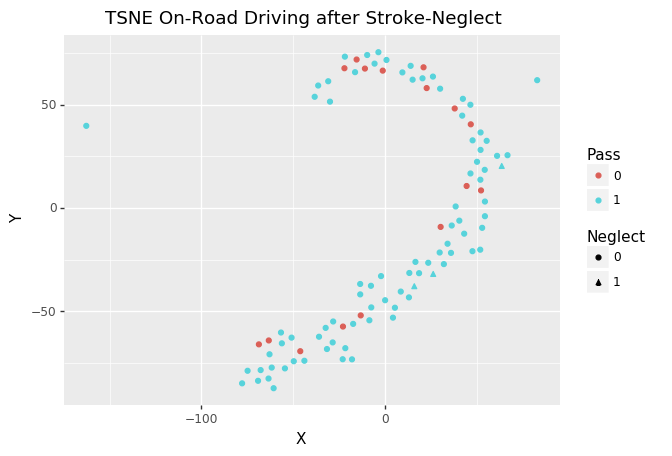

<ggplot: (-9223371936099285167)>

In [17]:
#Neglect
(ggplot (df)
 + geom_point(aes('X ', 'Y',color='factor(final_outcome)',shape='factor(Extinction90)'))
)+labs(color="Pass",shape="Neglect")+ggtitle("TSNE On-Road Driving after Stroke-Neglect")

In [18]:
#save dataframe
#data1.to_csv('cleandrivingdf.csv')

In [19]:
data1.columns

Index(['Age', 'gender', 'time_outcome', 'Aphasia', 'Extinction', 'Visualfield',
       'Aphasia90', 'Extinction90', 'NIHSS', 'NIHSS90', 'Visualfield90',
       'Rankin90', 'final_outcome'],
      dtype='object')

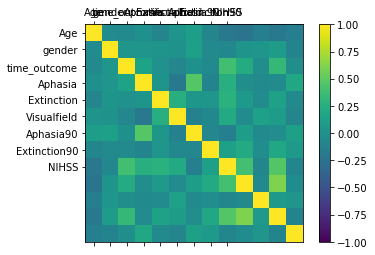

In [20]:
correlations = data1.corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data1.columns)
ax.set_yticklabels(data1.columns)
plt.show()

In [21]:
# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[5.35944065996667,
 4.353765302434735,
 2.489495003228894,
 2.3814448240948356,
 1.3276169447546902,
 1.5250026005602348,
 1.986804244316868,
 1.1467458292912902,
 5.800498887957341,
 4.860954258023375,
 1.0845804504633538,
 5.420463769805554]

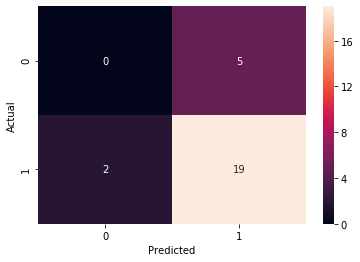

In [22]:
#partition data 75/25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)

#predict
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [23]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
#alternative writing print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy:  0.7307692307692307


In [24]:
#import matplotlib.pyplot as plt
#from sklearn import metrics
def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show() 
    
y_pred_proba = clf.predict_proba(X=X_test)

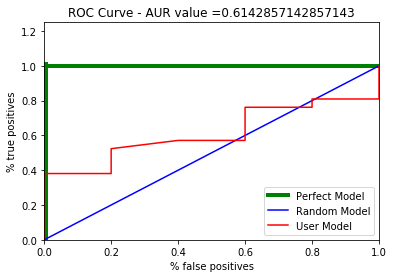

In [25]:
roccurve(y_values=y_test, y_preds_proba=y_pred_proba[:,1])

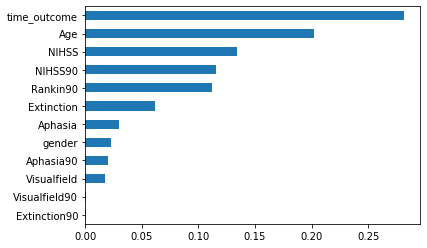

In [26]:
#plot feature importance
model_ranks=pd.Series(clf.feature_importances_,index=X_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

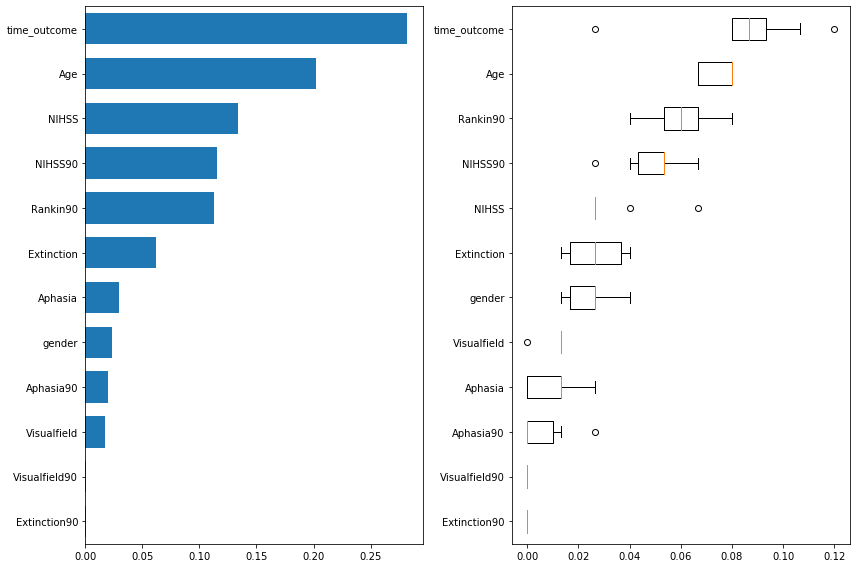

In [27]:
#trade X_train.columns for data.feature_names
#Next, we plot the tree based feature importance and the permutation importance. The permutation importance plot shows that permuting a feature drops the accuracy by at most 0.012, which would suggest that none of the features are important. This is in contradiction with the high test accuracy computed above: some feature must be important. The permutation importance is calculated on the training set to show how much the model relies on each feature during training.
result = permutation_importance(clf, X_train, y_train, n_repeats=10,random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [28]:
#predict outcome use the order
#Age, gender time etc
prediction = clf.predict([[50,1,730,1,0,0,0,0,0,0,0,0]])
print ('Predicted Result: ', prediction)

Predicted Result:  [1]


In [29]:
# tkinter GUI follow example from https://datatofish.com/random-forest-python/
# model created here as illustration
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 600, height = 400)
canvas1.pack()

# Age
label1 = tk.Label(root, text='Age:')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root)
canvas1.create_window(340, 100, window=entry1)

# gender
label2 = tk.Label(root, text='gender (male=1):     ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root)
canvas1.create_window(340, 120, window=entry2)

# time pass
label3 = tk.Label(root, text='time_outcome (days): ')
canvas1.create_window(140, 140, window=label3)

entry3 = tk.Entry (root)
canvas1.create_window(340, 140, window=entry3)

# Aphasia
label4 = tk.Label(root, text='Aphasia (yes=1): ')
canvas1.create_window(160, 160, window=label4)

entry4 = tk.Entry (root)
canvas1.create_window(340, 160, window=entry4)

# Extinction
label5 = tk.Label(root, text='Extinction (yes=1):   ')
canvas1.create_window(180, 180, window=label5)

entry5 = tk.Entry (root)
canvas1.create_window(340, 180, window=entry5)

# Visualfield
label6 = tk.Label(root, text='Visualfield (yes=1):   ')
canvas1.create_window(200, 200, window=label6)

entry6 = tk.Entry (root)
canvas1.create_window(340, 200, window=entry6)

# Aphasia90
label7 = tk.Label(root, text='Aphasia90 (yes=1):    ')
canvas1.create_window(220, 220, window=label7)

entry7 = tk.Entry (root)
canvas1.create_window(340, 220, window=entry7)

# Extinction90
label8 = tk.Label(root, text='Extinction90 (yes=1):  ')
canvas1.create_window(240, 240, window=label8)

entry8 = tk.Entry (root)
canvas1.create_window(340, 240, window=entry8)

# NIHSS
label9 = tk.Label(root, text='NIHSS (scale 0-42):   ')
canvas1.create_window(260, 260, window=label9)

entry9 = tk.Entry (root)
canvas1.create_window(340, 260, window=entry9)

# NIHSS90
label10 = tk.Label(root, text='NIHSS90 (scale 0-42):')
canvas1.create_window(280, 280, window=label10)

entry10 = tk.Entry (root)
canvas1.create_window(340, 280, window=entry10)

# Visualfield90
label11 = tk.Label(root, text='Visualfield90 (yes=1): ')
canvas1.create_window(300, 300, window=label11)

entry11 = tk.Entry (root)
canvas1.create_window(340, 300, window=entry11)

#Rankin90
label12 = tk.Label(root, text='Rankin90 (scale 0-6):')
canvas1.create_window(320, 320, window=label12)

entry12 = tk.Entry (root)
canvas1.create_window(340, 320, window=entry12)

#Age,gender,time_outcome,Aphasia, Extinction, Visualfield,Aphasia90, Extinction90, NIHSS, NIHSS90, Visualfield90, Rankin90

def values(): 
    global Age
    Age = float(entry1.get()) 
    
    global gender
    gender = float(entry2.get()) 
    
    global time_outcome
    time_outcome = float(entry3.get()) 
    
    global Aphasia
    Aphasia = float(entry4.get()) 
    
    global Extinction
    Extinction = float(entry5.get())
    
    global Visualfield
    Visualfield = float(entry6.get())
    
    global Aphasia90
    Aphasia90 = float(entry7.get()) 
    
    global Extinction90
    Extinction90 = float(entry8.get())
    
    global NIHSS
    NIHSS = float(entry9.get())
    
    global NIHSS90
    NIHSS90 = float(entry10.get()) 
    
    global Visualfield90
    Visualfield90 = float(entry11.get())
    
    global Rankin90
    Rankin90 = float(entry12.get())
    
    Prediction_result  = ('Predicted Result: ', clf.predict([[Age,gender,time_outcome,Aphasia, Extinction, Visualfield,Aphasia90, Extinction90, NIHSS, NIHSS90, Visualfield90, Rankin90]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='sky blue')
    canvas1.create_window(360, 360, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict',command=values, bg='green', fg='white', font=11)
canvas1.create_window(380, 380, window=button1)
 
root.mainloop()